In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("combined aqicn data (all german cities).csv")
df['date'] = pd.to_datetime(df['date'])
df.sort_values(by='date', ascending=False, inplace=True)
df.rename(columns={' pm10':'pm10', ' pm25':'pm25'}, inplace=True)
df.replace(' ', np.nan, inplace=True)
df['pm10'] = pd.to_numeric(df['pm10'], downcast='float')
df['pm25'] = pd.to_numeric(df['pm25'], downcast='float')
df.replace({'munich':'Munich','berlin,-germany':'Berlin','potsdam-zentrum,-germany':'Potsdam', 'hannover,-germany':'Hannover','stuttgart-bad-cannstatt, germany':'Stuttgart', 'dresden-bergstraße,-germany':'Dresden', 'sternschanze,-hamburg, germany':'Hamburg', 'frankfurt-schwanheim,-germany':'Frankfurt','kiel-bahnhofstr.-verk., schleswig-holstein, germany':'Kiel'}, inplace=True )

In [3]:
df.aggregate({'pm10':['min', 'max', 'mean', 'median'], 'pm25':['min', 'max', 'mean', 'median']})

,pm10,pm25
min,1.000000,4.000000
max,304.000000,179.000000
mean,17.688105,39.211708
median,15.000000,36.000000


In [4]:
df.sort_values(by='pm10', ascending=False).head(50)

,date,city,pm25,pm10
5746,2017-01-01,Munich,NaN,304.0
13998,2020-01-01,Munich,NaN,169.0
5751,2017-01-02,Munich,NaN,140.0
17417,2021-01-21,Berlin,NaN,119.0
17691,2021-02-23,Berlin,NaN,115.0
3470,2016-01-01,Munich,NaN,114.0
17712,2021-02-25,Berlin,NaN,113.0
17682,2021-02-22,Berlin,NaN,96.0
6018,2017-02-15,Berlin,NaN,95.0
17703,2021-02-24,Berlin,NaN,92.0


Text(0.5, 1.0, 'Air quality PM2.5 and PM10')

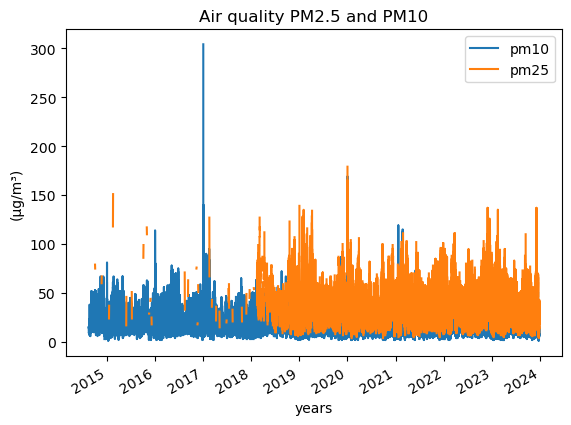

In [5]:
df.plot(x='date', y=['pm10', 'pm25'], kind="line")
plt.xlabel('years')
plt.ylabel('(µg/m³)')
plt.title('Air quality PM2.5 and PM10')

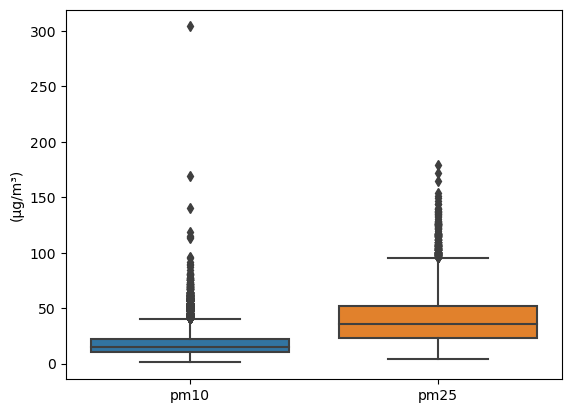

In [6]:
sns.boxplot(data=df.loc[:, ['pm10', 'pm25']]).set(ylabel='(µg/m³)')
plt.show()

In [7]:

#Berlin_df = df.query('city == "Berlin"')
#Berlin_df['city'] = 'Berlin'

In [8]:
def air_pollution_level(value):
    if value == value and value <= 50: #exclude NaN
        return "good"
    elif 51 <= value <= 100:
        return "moderate"
    elif 101 <= value <= 150:
        return "unhealthy for sensitive groups"
    elif 151 <= value <= 200:
        return "unhealthy"
    elif 201 <= value <= 300:
        return "very unhealthy"
    elif value >= 301:
        return "hazardous"
    else: 
        return "no data"

df['pm10_pollution_level'] = df['pm10'].map(air_pollution_level)
df['pm25_pollution_level'] = df['pm25'].map(air_pollution_level)

In [9]:
df_filter=df.loc[:,['city','date','pm10','pm10_pollution_level','pm25','pm25_pollution_level']]


In [10]:
df_filter_Berlin = df.query('city == "Berlin"')
print(df_filter_Berlin)

            date    city  pm25  pm10 pm10_pollution_level pm25_pollution_level
26814 2023-12-28  Berlin  40.0   NaN              no data                 good
26809 2023-12-27  Berlin  43.0  12.0                 good                 good
26793 2023-12-26  Berlin  22.0  15.0                 good                 good
26790 2023-12-25  Berlin  29.0   7.0                 good                 good
26780 2023-12-24  Berlin  29.0   9.0                 good                 good
...          ...     ...   ...   ...                  ...                  ...
37    2014-08-23  Berlin   NaN  21.0                 good              no data
33    2014-08-22  Berlin   NaN  38.0                 good              no data
24    2014-08-21  Berlin   NaN  23.0                 good              no data
22    2014-08-20  Berlin   NaN  20.0                 good              no data
14    2014-08-19  Berlin   NaN   NaN              no data              no data

[3194 rows x 6 columns]


In [11]:
df_filter_Berlin['pm10_pollution_level'].value_counts()

pm10_pollution_level
good                              3046
moderate                           130
no data                             15
unhealthy for sensitive groups       3
Name: count, dtype: int64

In [12]:
df_filter_Berlin.groupby(['pm10_pollution_level']).get_group('unhealthy for sensitive groups')

,date,city,pm25,pm10,pm10_pollution_level,pm25_pollution_level
17712,2021-02-25,Berlin,NaN,113.0,unhealthy for sensitive groups,no data
17691,2021-02-23,Berlin,NaN,115.0,unhealthy for sensitive groups,no data
17417,2021-01-21,Berlin,NaN,119.0,unhealthy for sensitive groups,no data


Text(0.5, 1.0, 'Air quality PM10 in Berlin')

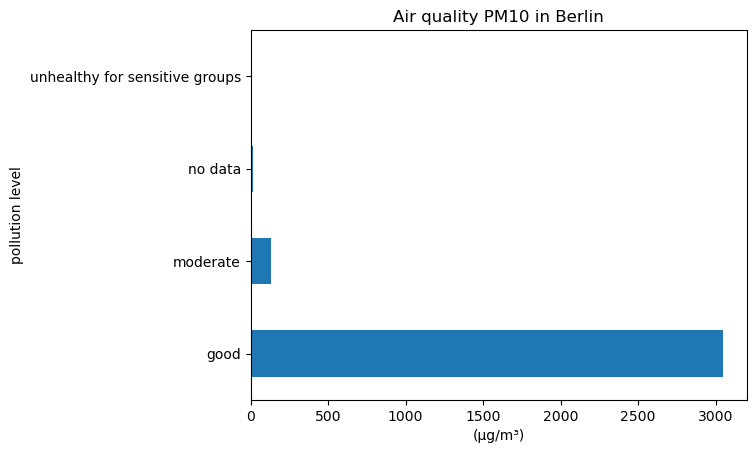

In [13]:
df_filter_Berlin['pm10_pollution_level'].value_counts().plot(kind='barh')
plt.xlabel('(µg/m³)')
plt.ylabel('pollution level')
plt.title('Air quality PM10 in Berlin')

In [14]:
df_filter_Berlin.aggregate({'pm10':['min', 'max', 'mean', 'median']})

,pm10
min,6.000000
max,119.000000
mean,26.188423
median,24.000000


In [16]:
df_hannover = df.query('city == "Hannover"')
print(df_hannover)

            date      city  pm25  pm10 pm10_pollution_level  \
26813 2023-12-28  Hannover   NaN   5.0                 good   
26801 2023-12-27  Hannover   NaN   9.0                 good   
26800 2023-12-26  Hannover   NaN   5.0                 good   
26784 2023-12-25  Hannover   NaN   4.0                 good   
26779 2023-12-24  Hannover   NaN   2.0                 good   
...          ...       ...   ...   ...                  ...   
41    2014-08-23  Hannover   NaN  13.0                 good   
34    2014-08-22  Hannover   NaN  12.0                 good   
23    2014-08-21  Hannover   NaN  12.0                 good   
17    2014-08-20  Hannover   NaN   7.0                 good   
13    2014-08-19  Hannover   NaN   NaN              no data   

      pm25_pollution_level  
26813              no data  
26801              no data  
26800              no data  
26784              no data  
26779              no data  
...                    ...  
41                 no data  
34         

In [17]:
df_hannover.sort_values(by='pm10', ascending=False).head(10)

,date,city,pm25,pm10,pm10_pollution_level,pm25_pollution_level
13613,2019-11-16,Hannover,NaN,87.0,moderate,no data
13996,2020-01-01,Hannover,NaN,76.0,moderate,no data
9617,2018-08-19,Hannover,NaN,72.0,moderate,no data
3505,2016-01-07,Hannover,NaN,70.0,moderate,no data
8300,2018-03-07,Hannover,NaN,61.0,moderate,no data
3495,2016-01-06,Hannover,NaN,61.0,moderate,no data
942,2015-01-01,Hannover,NaN,60.0,moderate,no data
1269,2015-02-17,Hannover,NaN,59.0,moderate,no data
5993,2017-02-11,Hannover,NaN,58.0,moderate,no data
13603,2019-11-15,Hannover,NaN,58.0,moderate,no data


In [18]:
df_hannover.groupby(['pm10_pollution_level']).get_group('moderate')

,date,city,pm25,pm10,pm10_pollution_level,pm25_pollution_level
13996,2020-01-01,Hannover,NaN,76.0,moderate,no data
13613,2019-11-16,Hannover,NaN,87.0,moderate,no data
13603,2019-11-15,Hannover,NaN,58.0,moderate,no data
9617,2018-08-19,Hannover,NaN,72.0,moderate,no data
8300,2018-03-07,Hannover,NaN,61.0,moderate,no data
6015,2017-02-15,Hannover,NaN,56.0,moderate,no data
6012,2017-02-14,Hannover,NaN,56.0,moderate,no data
6008,2017-02-13,Hannover,NaN,55.0,moderate,no data
5999,2017-02-12,Hannover,NaN,54.0,moderate,no data
5993,2017-02-11,Hannover,NaN,58.0,moderate,no data


In [19]:
df_hannover['pm10_pollution_level'].value_counts()

pm10_pollution_level
good        3175
no data       32
moderate      20
Name: count, dtype: int64

Text(0.5, 1.0, 'Air quality PM10 in Hannover')

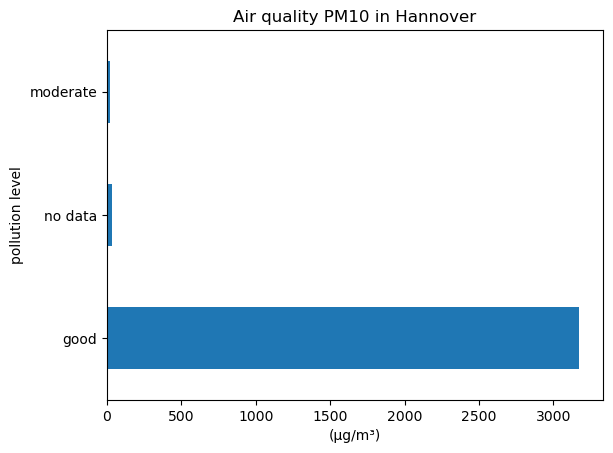

In [20]:
df_hannover['pm10_pollution_level'].value_counts().plot(kind='barh')
plt.xlabel('(µg/m³)')
plt.ylabel('pollution level')
plt.title('Air quality PM10 in Hannover')

Text(0.5, 1.0, 'Air quality PM10 in Hannover')

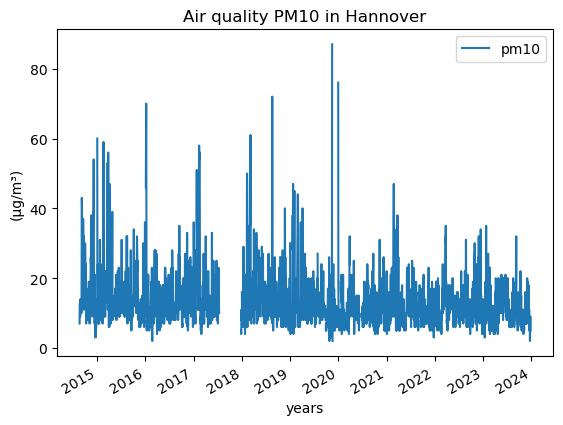

In [21]:
df_hannover.plot(x='date', y=['pm10'], kind="line")
plt.xlabel('years')
plt.ylabel('(µg/m³)')
plt.title('Air quality PM10 in Hannover')

city
Berlin       Axes(0.125,0.2;0.775x0.68)
Dresden      Axes(0.125,0.2;0.775x0.68)
Frankfurt    Axes(0.125,0.2;0.775x0.68)
Hamburg      Axes(0.125,0.2;0.775x0.68)
Hannover     Axes(0.125,0.2;0.775x0.68)
Kiel         Axes(0.125,0.2;0.775x0.68)
Munich       Axes(0.125,0.2;0.775x0.68)
Potsdam      Axes(0.125,0.2;0.775x0.68)
Stuttgart    Axes(0.125,0.2;0.775x0.68)
Name: pm10, dtype: object

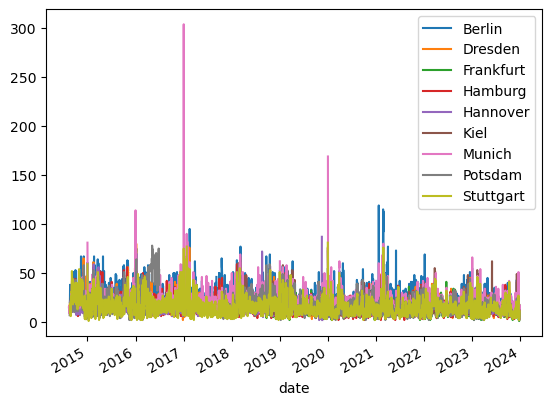

In [22]:
df_copy = df
df_copy.set_index('date', inplace=True)
df_copy.groupby('city')['pm10'].plot(legend=True)

In [23]:
df_copy.groupby(['city', 'pm10_pollution_level']).size().unstack(fill_value=0)

pm10_pollution_level,good,hazardous,moderate,no data,unhealthy,unhealthy for sensitive groups
city,,,,,,
Berlin,3046,0,130,15,0,3
Dresden,2976,0,25,341,0,0
Frankfurt,1899,0,2,12,0,0
Hamburg,3355,0,19,29,0,0
Hannover,3175,0,20,32,0,0
Kiel,1994,0,15,81,0,0
Munich,3266,1,47,8,1,2
Potsdam,2829,0,76,18,0,0
Stuttgart,3357,0,24,20,0,0


<Axes: ylabel='city'>

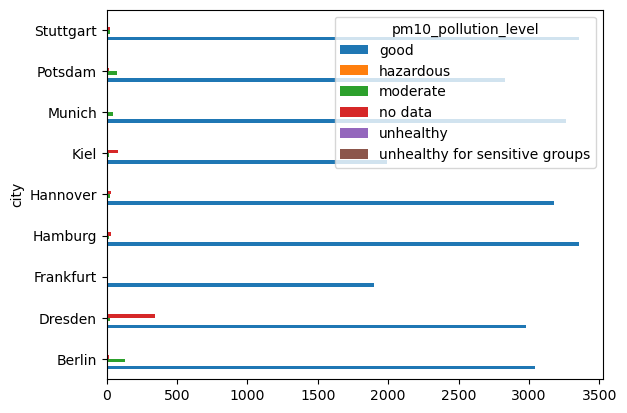

In [24]:
df_copy.groupby(['city', 'pm10_pollution_level']).size().unstack().plot(kind = "barh")

<Axes: xlabel='city'>

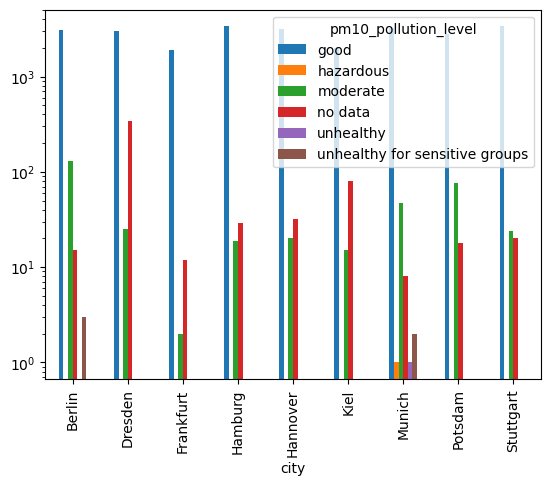

In [25]:
df_copy.groupby(['city', 'pm10_pollution_level']).size().unstack().plot(kind = "bar", logy=True)

<Axes: xlabel='city'>

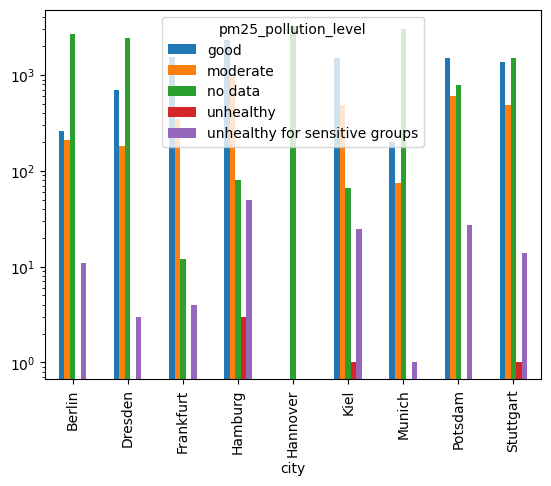

In [26]:
df_copy.groupby(['city', 'pm25_pollution_level']).size().unstack().plot(kind = "bar", logy=True)

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(1, 0, 'Berlin'),
  Text(2, 0, 'Dresden'),
  Text(3, 0, 'Frankfurt'),
  Text(4, 0, 'Hamburg'),
  Text(5, 0, 'Hannover'),
  Text(6, 0, 'Kiel'),
  Text(7, 0, 'Munich'),
  Text(8, 0, 'Potsdam'),
  Text(9, 0, 'Stuttgart')])

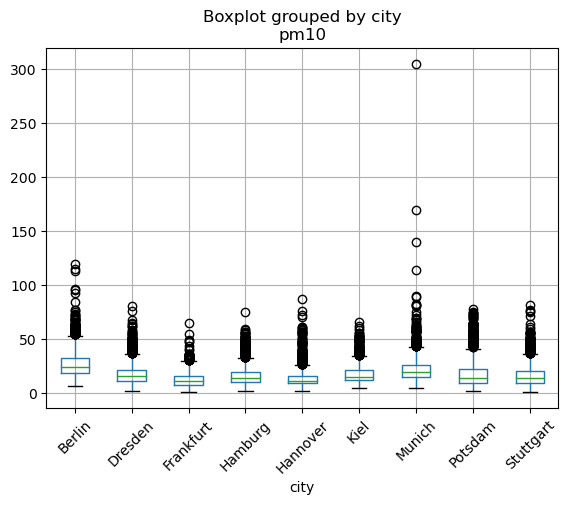

In [27]:
df_copy.boxplot(column='pm10',by='city')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(1, 0, 'Berlin'),
  Text(2, 0, 'Dresden'),
  Text(3, 0, 'Frankfurt'),
  Text(4, 0, 'Hamburg'),
  Text(5, 0, 'Hannover'),
  Text(6, 0, 'Kiel'),
  Text(7, 0, 'Munich'),
  Text(8, 0, 'Potsdam'),
  Text(9, 0, 'Stuttgart')])

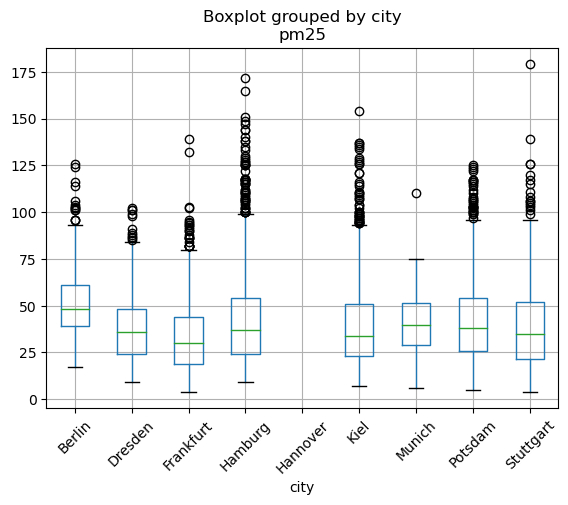

In [28]:
df_copy.boxplot(column=['pm25'],by='city') 
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

In [29]:
df_dresden = df.query('city == "Dresden"')
print(df_dresden)
df_dresden['pm10_pollution_level'].value_counts()

               city  pm25  pm10 pm10_pollution_level pm25_pollution_level
date                                                                     
2023-12-28  Dresden  19.0   NaN              no data                 good
2023-12-27  Dresden  34.0  10.0                 good                 good
2023-12-26  Dresden   NaN  12.0                 good              no data
2023-12-25  Dresden   NaN   4.0                 good              no data
2023-12-24  Dresden   NaN   4.0                 good              no data
...             ...   ...   ...                  ...                  ...
2014-08-21  Dresden   NaN  20.0                 good              no data
2014-08-20  Dresden   NaN  16.0                 good              no data
2014-08-19  Dresden   NaN  17.0                 good              no data
2014-08-18  Dresden   NaN  10.0                 good              no data
2014-08-17  Dresden   NaN  10.0                 good              no data

[3342 rows x 5 columns]


pm10_pollution_level
good        2976
no data      341
moderate      25
Name: count, dtype: int64

In [30]:
df_dresden['pm25_pollution_level'].value_counts()

pm25_pollution_level
no data                           2456
good                               699
moderate                           184
unhealthy for sensitive groups       3
Name: count, dtype: int64

In [31]:
df_frankfurt = df.query('city == "Frankfurt"')
print(df_frankfurt)
df_frankfurt['pm10_pollution_level'].value_counts()

                 city  pm25  pm10 pm10_pollution_level pm25_pollution_level
date                                                                       
2023-12-28  Frankfurt  29.0   NaN              no data                 good
2023-12-27  Frankfurt  20.0   8.0                 good                 good
2023-12-26  Frankfurt   9.0   7.0                 good                 good
2023-12-25  Frankfurt   8.0   3.0                 good                 good
2023-12-24  Frankfurt   5.0   2.0                 good                 good
...               ...   ...   ...                  ...                  ...
2018-09-14  Frankfurt  23.0  11.0                 good                 good
2018-09-13  Frankfurt  32.0  12.0                 good                 good
2018-09-12  Frankfurt  33.0  14.0                 good                 good
2018-09-11  Frankfurt  28.0  23.0                 good                 good
2018-09-10  Frankfurt   NaN  20.0                 good              no data

[1913 rows 

pm10_pollution_level
good        1899
no data       12
moderate       2
Name: count, dtype: int64

In [32]:
df_frankfurt['pm25_pollution_level'].value_counts()

pm25_pollution_level
good                              1552
moderate                           345
no data                             12
unhealthy for sensitive groups       4
Name: count, dtype: int64

In [33]:
df_hamburg = df.query('city == "Hamburg"')
print(df_hamburg)
df_hamburg['pm10_pollution_level'].value_counts()

               city  pm25  pm10 pm10_pollution_level pm25_pollution_level
date                                                                     
2023-12-27  Hamburg  23.0   9.0                 good                 good
2023-12-26  Hamburg  28.0   9.0                 good                 good
2023-12-25  Hamburg  22.0  10.0                 good                 good
2023-12-24  Hamburg   9.0   7.0                 good                 good
2023-12-23  Hamburg  16.0   2.0                 good                 good
...             ...   ...   ...                  ...                  ...
2014-08-22  Hamburg  47.0  14.0                 good                 good
2014-08-21  Hamburg  25.0  15.0                 good                 good
2014-08-20  Hamburg  15.0   9.0                 good                 good
2014-08-19  Hamburg  21.0   9.0                 good                 good
2014-08-18  Hamburg   NaN  10.0                 good              no data

[3403 rows x 5 columns]


pm10_pollution_level
good        3355
no data       29
moderate      19
Name: count, dtype: int64

In [34]:
df_hamburg['pm25_pollution_level'].value_counts()

pm25_pollution_level
good                              2306
moderate                           964
no data                             80
unhealthy for sensitive groups      50
unhealthy                            3
Name: count, dtype: int64

In [35]:
df_hannover = df.query('city == "Hannover"')
print(df_hannover)
df_hannover['pm10_pollution_level'].value_counts()

                city  pm25  pm10 pm10_pollution_level pm25_pollution_level
date                                                                      
2023-12-28  Hannover   NaN   5.0                 good              no data
2023-12-27  Hannover   NaN   9.0                 good              no data
2023-12-26  Hannover   NaN   5.0                 good              no data
2023-12-25  Hannover   NaN   4.0                 good              no data
2023-12-24  Hannover   NaN   2.0                 good              no data
...              ...   ...   ...                  ...                  ...
2014-08-23  Hannover   NaN  13.0                 good              no data
2014-08-22  Hannover   NaN  12.0                 good              no data
2014-08-21  Hannover   NaN  12.0                 good              no data
2014-08-20  Hannover   NaN   7.0                 good              no data
2014-08-19  Hannover   NaN   NaN              no data              no data

[3227 rows x 5 columns]


pm10_pollution_level
good        3175
no data       32
moderate      20
Name: count, dtype: int64

In [36]:
df_hannover['pm25_pollution_level'].value_counts()

pm25_pollution_level
no data    3227
Name: count, dtype: int64

In [37]:
df_kiel = df.query('city == "Kiel"')
print(df_kiel)
df_kiel['pm10_pollution_level'].value_counts()

            city  pm25  pm10 pm10_pollution_level pm25_pollution_level
date                                                                  
2023-12-28  Kiel  14.0   NaN              no data                 good
2023-12-27  Kiel  20.0   9.0                 good                 good
2023-12-26  Kiel  16.0  13.0                 good                 good
2023-12-25  Kiel  34.0  11.0                 good                 good
2023-12-24  Kiel  18.0  18.0                 good                 good
...          ...   ...   ...                  ...                  ...
2018-02-16  Kiel  57.0  34.0                 good             moderate
2018-02-15  Kiel  83.0  23.0                 good             moderate
2018-02-14  Kiel  73.0  40.0                 good             moderate
2018-02-13  Kiel  73.0  45.0                 good             moderate
2018-02-12  Kiel   NaN  29.0                 good              no data

[2090 rows x 5 columns]


pm10_pollution_level
good        1994
no data       81
moderate      15
Name: count, dtype: int64

In [38]:
df_kiel['pm25_pollution_level'].value_counts()

pm25_pollution_level
good                              1505
moderate                           493
no data                             66
unhealthy for sensitive groups      25
unhealthy                            1
Name: count, dtype: int64

In [39]:
df_munich = df.query('city == "Munich"')
print(df_munich)
df_munich['pm10_pollution_level'].value_counts()

              city  pm25  pm10 pm10_pollution_level pm25_pollution_level
date                                                                    
2023-12-28  Munich  24.0   NaN              no data                 good
2023-12-27  Munich  42.0  14.0                 good                 good
2023-12-26  Munich  29.0  17.0                 good                 good
2023-12-25  Munich  19.0  11.0                 good                 good
2023-12-24  Munich   6.0   7.0                 good                 good
...            ...   ...   ...                  ...                  ...
2014-08-17  Munich   NaN  10.0                 good              no data
2014-08-16  Munich   NaN   9.0                 good              no data
2014-08-15  Munich   NaN  14.0                 good              no data
2014-08-14  Munich   NaN  15.0                 good              no data
2014-08-13  Munich   NaN  15.0                 good              no data

[3325 rows x 5 columns]


pm10_pollution_level
good                              3266
moderate                            47
no data                              8
unhealthy for sensitive groups       2
unhealthy                            1
hazardous                            1
Name: count, dtype: int64

In [40]:
df_munich['pm25_pollution_level'].value_counts()

pm25_pollution_level
no data                           3049
good                               200
moderate                            75
unhealthy for sensitive groups       1
Name: count, dtype: int64

In [41]:
df_stuttgart = df.query('city == "Stuttgart"')
print(df_stuttgart)
df_stuttgart['pm10_pollution_level'].value_counts()

                 city  pm25  pm10 pm10_pollution_level pm25_pollution_level
date                                                                       
2023-12-28  Stuttgart  35.0   NaN              no data                 good
2023-12-27  Stuttgart  18.0  11.0                 good                 good
2023-12-26  Stuttgart  10.0   5.0                 good                 good
2023-12-25  Stuttgart   5.0   3.0                 good                 good
2023-12-24  Stuttgart   4.0   2.0                 good                 good
...               ...   ...   ...                  ...                  ...
2014-08-23  Stuttgart   NaN  16.0                 good              no data
2014-08-22  Stuttgart   NaN  19.0                 good              no data
2014-08-21  Stuttgart   NaN  15.0                 good              no data
2014-08-20  Stuttgart   NaN  12.0                 good              no data
2014-08-19  Stuttgart   NaN   NaN              no data              no data

[3401 rows 

pm10_pollution_level
good        3357
moderate      24
no data       20
Name: count, dtype: int64

In [42]:
df_stuttgart['pm25_pollution_level'].value_counts()

pm25_pollution_level
no data                           1526
good                              1369
moderate                           491
unhealthy for sensitive groups      14
unhealthy                            1
Name: count, dtype: int64

In [43]:
df_potsdam = df.query('city == "Potsdam"')
print(df_potsdam)
df_potsdam['pm10_pollution_level'].value_counts()


               city  pm25  pm10 pm10_pollution_level pm25_pollution_level
date                                                                     
2023-12-28  Potsdam  21.0   NaN              no data                 good
2023-12-27  Potsdam  26.0   6.0                 good                 good
2023-12-26  Potsdam  14.0  10.0                 good                 good
2023-12-25  Potsdam  15.0   5.0                 good                 good
2023-12-24  Potsdam  11.0   5.0                 good                 good
...             ...   ...   ...                  ...                  ...
2014-08-23  Potsdam   NaN  13.0                 good              no data
2014-08-22  Potsdam   NaN  14.0                 good              no data
2014-08-21  Potsdam   NaN  11.0                 good              no data
2014-08-20  Potsdam   NaN   7.0                 good              no data
2014-08-19  Potsdam   NaN   NaN              no data              no data

[2923 rows x 5 columns]


pm10_pollution_level
good        2829
moderate      76
no data       18
Name: count, dtype: int64

In [44]:
df_potsdam['pm25_pollution_level'].value_counts()

pm25_pollution_level
good                              1494
no data                            798
moderate                           604
unhealthy for sensitive groups      27
Name: count, dtype: int64